In [150]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams ['figure.figsize']=20,6

In [151]:
dataset = pd.read_csv("test.csv")
dataset['date']= pd.to_datetime(dataset['date'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['date'])


In [152]:
from datetime import datetime
indexedDataset.head(27)


,temperature
date,
2019-03-01,30
2019-03-02,32
2019-03-03,31
2019-03-04,30
2019-03-05,30
2019-03-06,32
2019-03-07,29
2019-03-08,29
2019-03-09,31


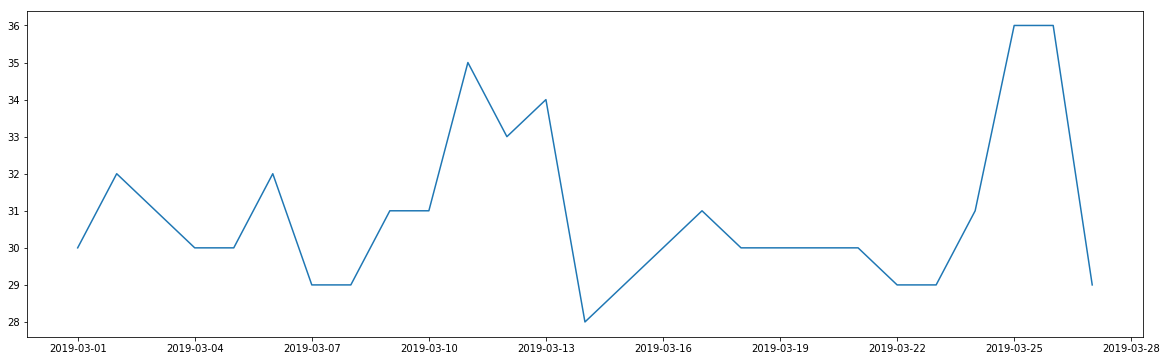

In [153]:
plt.xlabel = 'date'
plt.ylabel = 'temperature'
plt.plot(indexedDataset)


In [186]:
rolmean = indexedDataset.rolling(window=5).mean()
rolstd = indexedDataset.rolling(window=5).std()
print(rolmean,rolstd)


            temperature
date                   
2019-03-01          NaN
2019-03-02          NaN
2019-03-03          NaN
2019-03-04          NaN
2019-03-05         30.6
2019-03-06         31.0
2019-03-07         30.4
2019-03-08         30.0
2019-03-09         30.2
2019-03-10         30.4
2019-03-11         31.0
2019-03-12         31.8
2019-03-13         32.8
2019-03-14         32.2
2019-03-15         31.8
2019-03-16         30.8
2019-03-17         30.4
2019-03-18         29.6
2019-03-19         30.0
2019-03-20         30.2
2019-03-21         30.2
2019-03-22         29.8
2019-03-23         29.6
2019-03-24         29.8
2019-03-25         31.0
2019-03-26         32.2
2019-03-27         32.2             temperature
date                   
2019-03-01          NaN
2019-03-02          NaN
2019-03-03          NaN
2019-03-04          NaN
2019-03-05     0.894427
2019-03-06     1.000000
2019-03-07     1.140175
2019-03-08     1.224745
2019-03-09     1.303840
2019-03-10     1.341641
2019-03-11     2

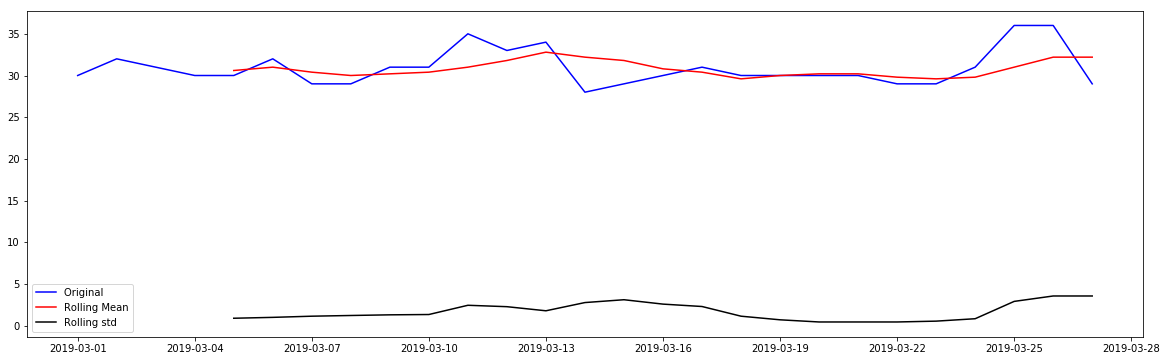

In [187]:
orig=plt.plot(indexedDataset,color = 'blue',label = 'Original ')
mean = plt.plot(rolmean,color='red',label ='Rolling Mean')
std=plt.plot(rolstd,color='black',label ='Rolling std')
plt.legend(loc='best')
plt.show(block=False)


In [188]:
from statsmodels.tsa.stattools import adfuller

print('Results of dickey fuller test')
dftest = adfuller(indexedDataset['temperature'],autolag='AIC')

dfoutput =pd.Series(dftest[0:4],index=['Test Value','pvalue','Lags used','Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value
    
print (dfoutput)    

Results of dickey fuller test
Test Value                     -3.935411
pvalue                          0.001789
Lags used                       2.000000
Number of observations used    24.000000
Critical Value(1%)             -3.737709
Critical Value(5%)             -2.992216
Critical Value(10%)            -2.635747
dtype: float64


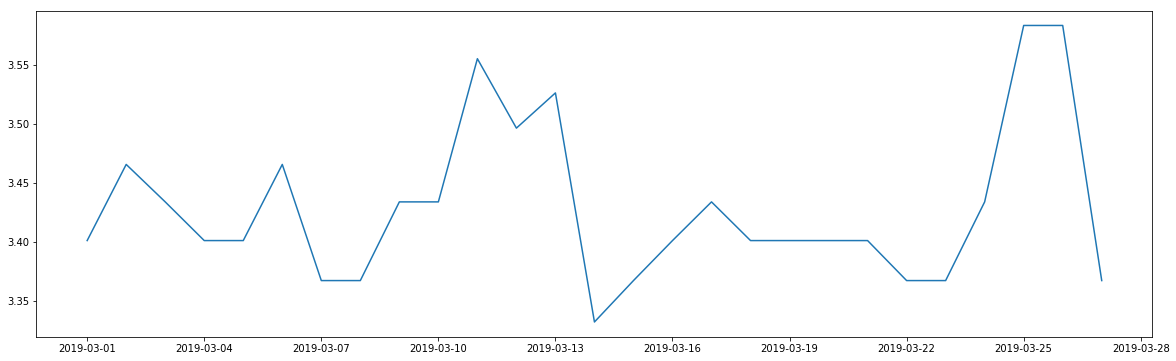

In [189]:
indexedDataset_logScale= np.log(indexedDataset)
plt.plot(indexedDataset_logScale)


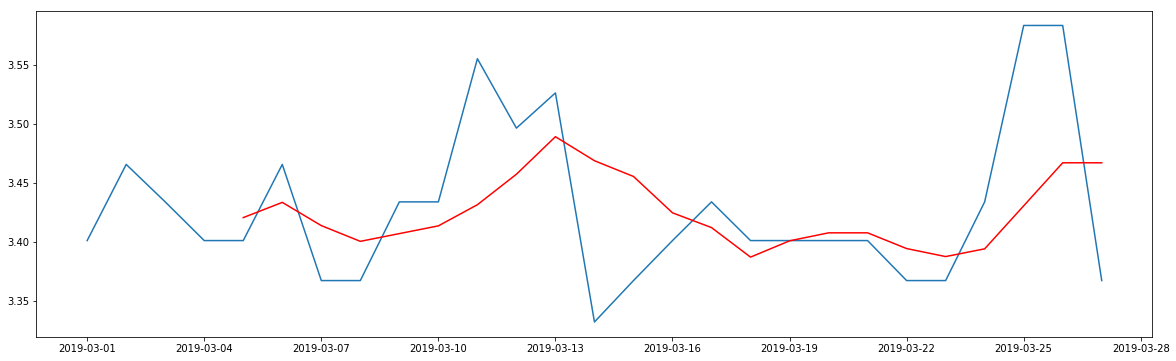

In [158]:
movingAverage = indexedDataset_logScale.rolling(window=5).mean()
movingstd = indexedDataset_logScale.rolling(window=5).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')


In [159]:
dataset_logScaleminusmovingAverage=indexedDataset_logScale-movingAverage
dataset_logScaleminusmovingAverage.head(5)
dataset_logScaleminusmovingAverage.dropna(inplace=True)
dataset_logScaleminusmovingAverage.head(3)


,temperature
date,
2019-03-05,-0.019466
2019-03-06,0.032165
2019-03-07,-0.046587


In [160]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAVerage = timeseries.rolling(window=5).mean()
    movingStd = timeseries.rolling(window=5).std()
    
    orig=plt.plot(timeseries,color = 'blue',label = 'Original ')
    mean = plt.plot(movingAVerage,color='red',label ='Rolling Mean')
    std=plt.plot(movingStd,color='black',label ='Rolling std')
    plt.legend(loc='best')
    plt.show(block=False)
    
    
    print('Results of dickey fuller test')
    dftest = adfuller(timeseries['temperature'],autolag='AIC')

    dfoutput =pd.Series(dftest[0:4],index=['Test Value','pvalue','Lags used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    print (dfoutput)
    
    


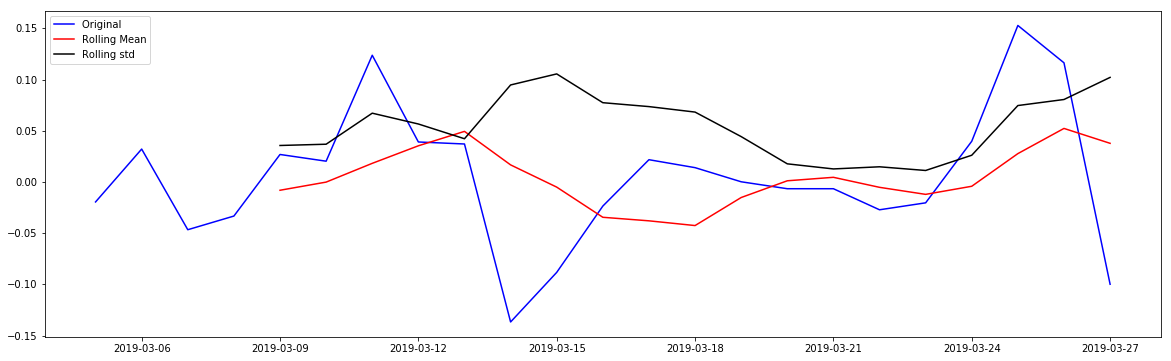

Results of dickey fuller test
Test Value                     -3.575895
pvalue                          0.006239
Lags used                       1.000000
Number of observations used    21.000000
Critical Value(1%)             -3.788386
Critical Value(5%)             -3.013098
Critical Value(10%)            -2.646397
dtype: float64


In [161]:
test_stationarity(dataset_logScaleminusmovingAverage)

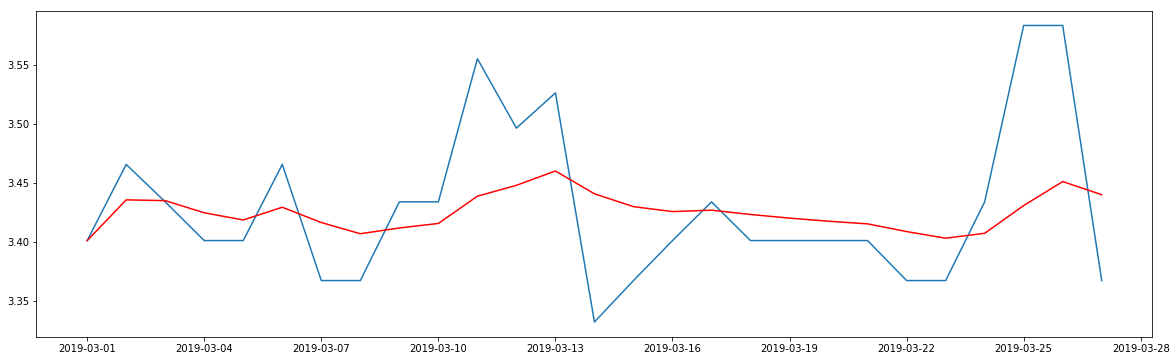

In [162]:
exponentialDecayedWeightAverage=indexedDataset_logScale.ewm(halflife=5,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayedWeightAverage,color='red')


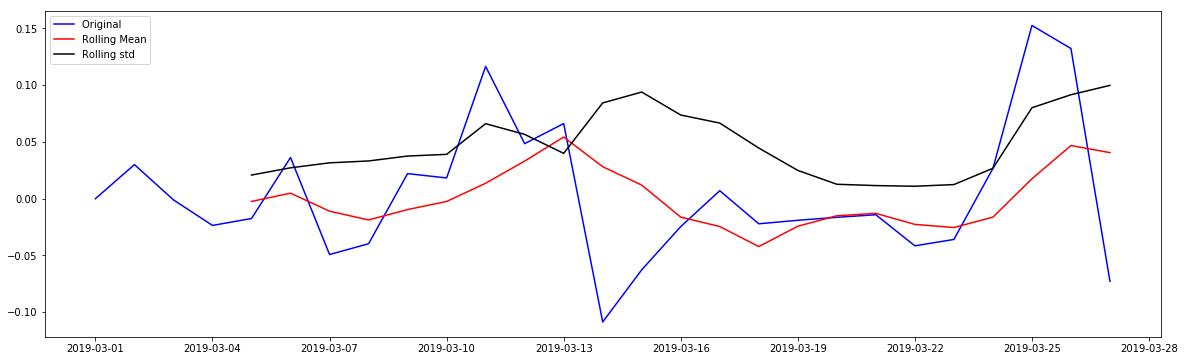

Results of dickey fuller test
Test Value                     -4.075605
pvalue                          0.001062
Lags used                       2.000000
Number of observations used    24.000000
Critical Value(1%)             -3.737709
Critical Value(5%)             -2.992216
Critical Value(10%)            -2.635747
dtype: float64


In [163]:
ir= indexedDataset_logScale - exponentialDecayedWeightAverage
test_stationarity(ir)


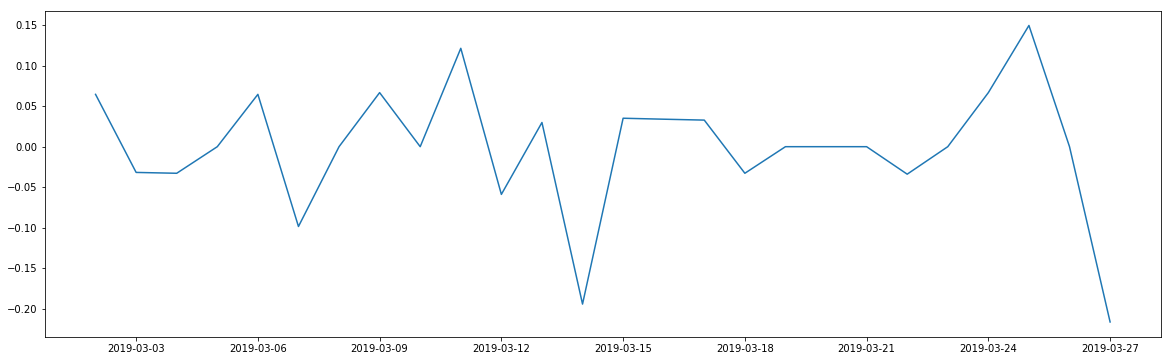

In [164]:
i6 = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(i6)

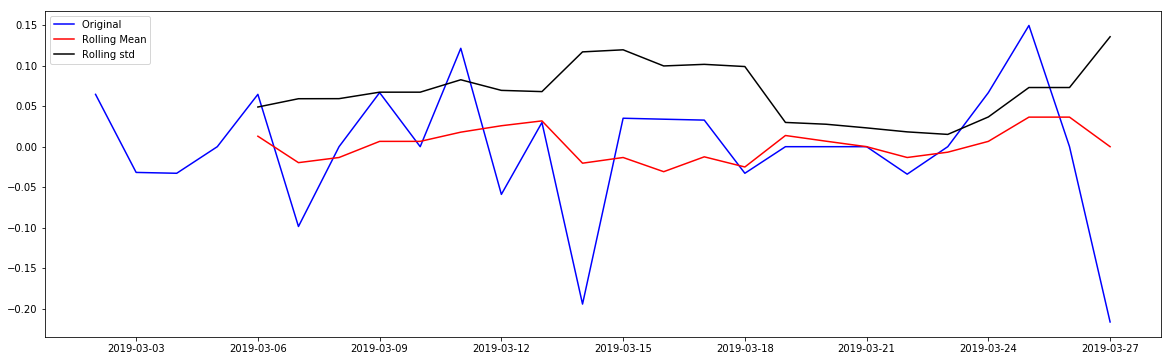

Results of dickey fuller test
Test Value                     -4.642626
pvalue                          0.000108
Lags used                       2.000000
Number of observations used    23.000000
Critical Value(1%)             -3.752928
Critical Value(5%)             -2.998500
Critical Value(10%)            -2.638967
dtype: float64


In [165]:
i6.dropna(inplace=True)
test_stationarity(i6)


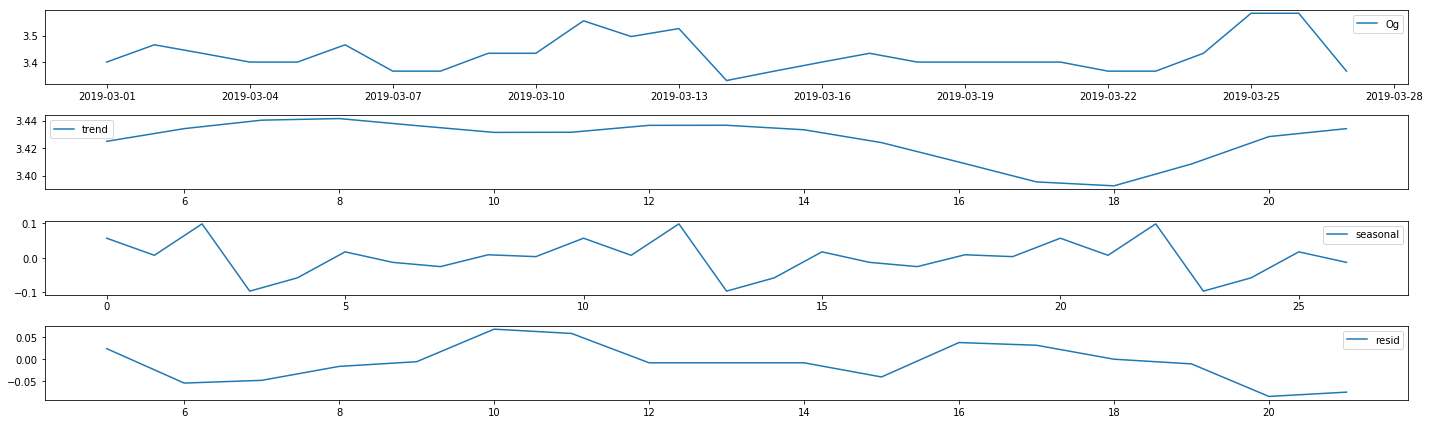

In [170]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =seasonal_decompose(indexedDataset_logScale.values, freq=10)

trend = decomposition.trend
seasonal= decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label ='Og')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend,label ='trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal,label ='seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual,label ='resid')
plt.legend(loc = 'best')
plt.tight_layout()


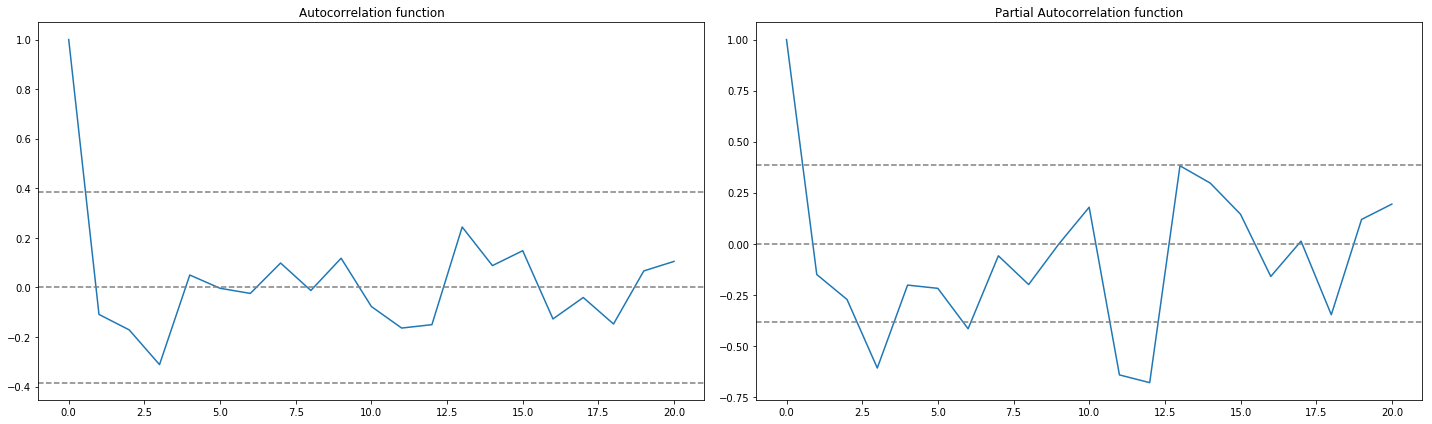

In [171]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(i6,nlags=20)
lag_pacf=pacf(i6,nlags=20,method = 'ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(i6)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(i6)),linestyle='--',color='gray')
plt.title('Autocorrelation function')


plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(i6)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(i6)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation function')
plt.tight_layout()



Plotting AR Model


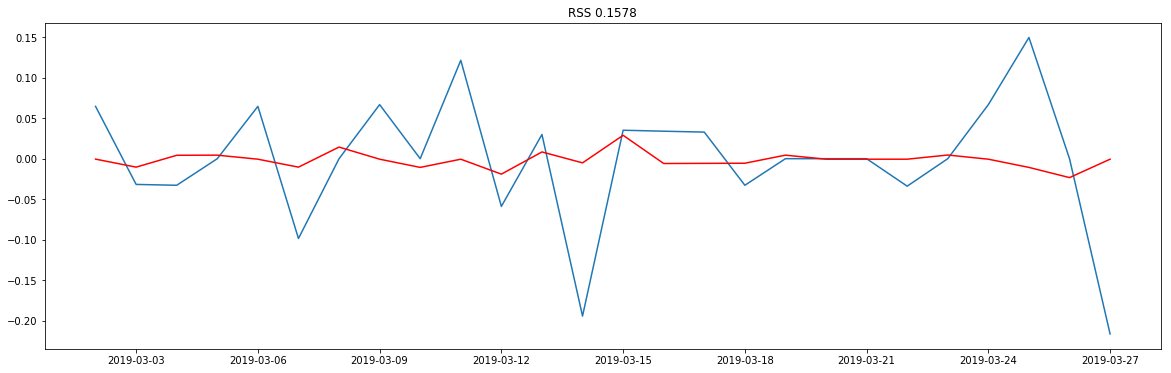

In [172]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logScale,order=(1,1,0))
result_AR = model.fit(disp=-1)
plt.plot(i6)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS %.4f'% sum((result_AR.fittedvalues-i6['temperature'])**2))
print('Plotting AR Model')

Plotting AR Model


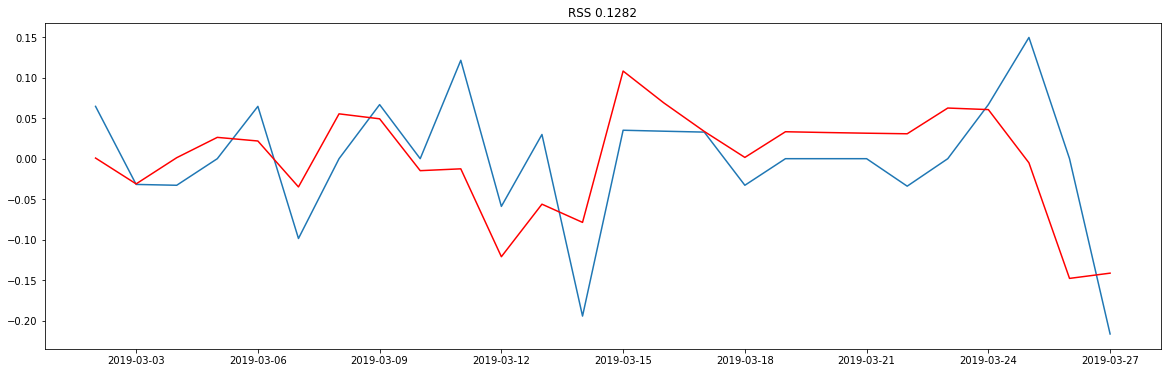

In [173]:
model = ARIMA(indexedDataset_logScale,order=(0,1,1))
result_MA = model.fit(disp=-1)
plt.plot(i6)
plt.plot(result_MA.fittedvalues,color='red')
plt.title('RSS %.4f'% sum((result_MA.fittedvalues-i6['temperature'])**2))
print('Plotting AR Model')

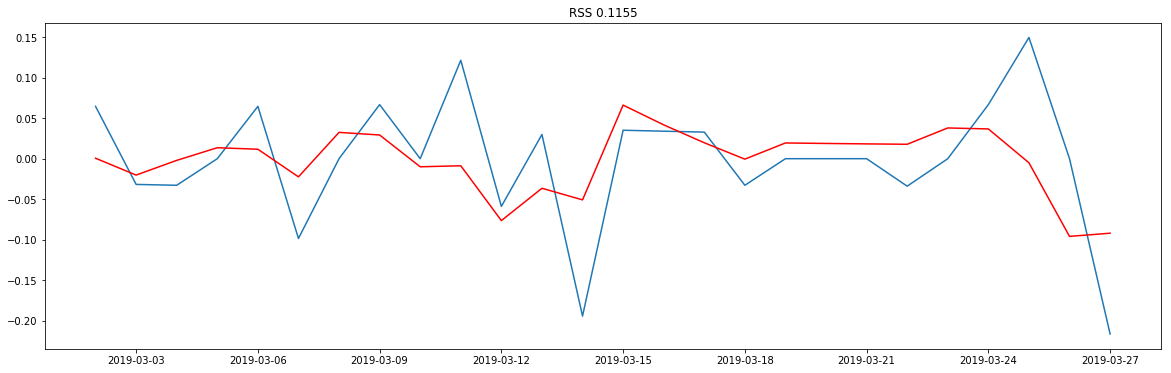

In [174]:
model = ARIMA(indexedDataset_logScale,order=(1,1,1))
result_ARIMA = model.fit(disp=-1)
plt.plot(i6)
plt.plot(result_ARIMA.fittedvalues,color='red')
plt.title('RSS %.4f'% sum((result_ARIMA.fittedvalues-i6['temperature'])**2))


In [175]:
predictions_ARIMA_diff=pd.Series(result_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())


date
2019-03-02    0.000553
2019-03-03   -0.020216
2019-03-04   -0.002073
2019-03-05    0.013526
2019-03-06    0.011661
dtype: float64


In [176]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()

print(predictions_ARIMA_diff_cumsum.head())

date
2019-03-02    0.000553
2019-03-03   -0.019663
2019-03-04   -0.021736
2019-03-05   -0.008210
2019-03-06    0.003450
dtype: float64


In [177]:
predictions_ARIMA_log=pd.Series(indexedDataset_logScale['temperature'].ix[0],index=indexedDataset_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2019-03-01    3.401197
2019-03-02    3.401750
2019-03-03    3.381534
2019-03-04    3.379461
2019-03-05    3.392987
dtype: float64

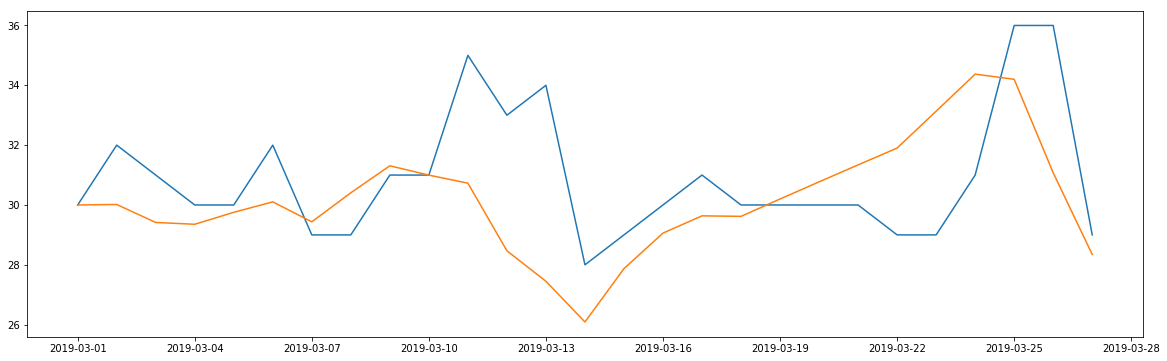

In [178]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)


In [179]:
indexedDataset_logScale

,temperature
date,
2019-03-01,3.401197
2019-03-02,3.465736
2019-03-03,3.433987
2019-03-04,3.401197
2019-03-05,3.401197
2019-03-06,3.465736
2019-03-07,3.367296
2019-03-08,3.367296
2019-03-09,3.433987


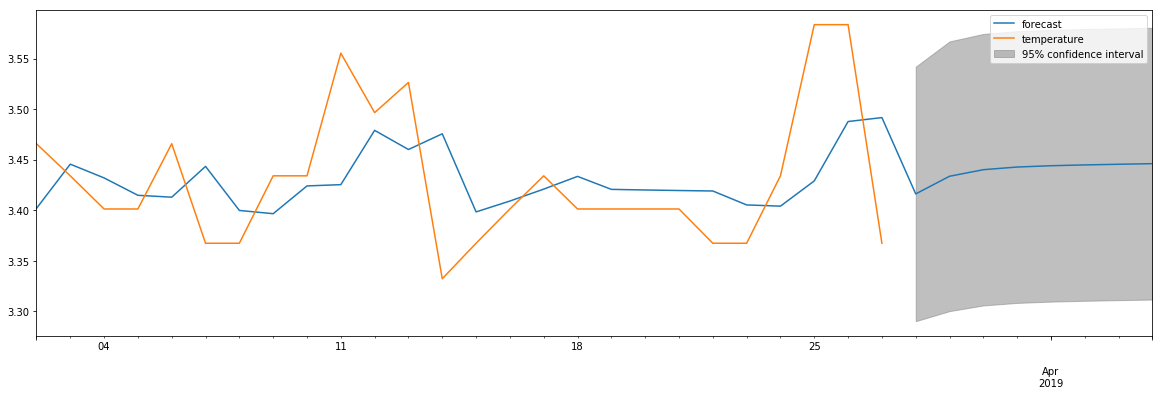

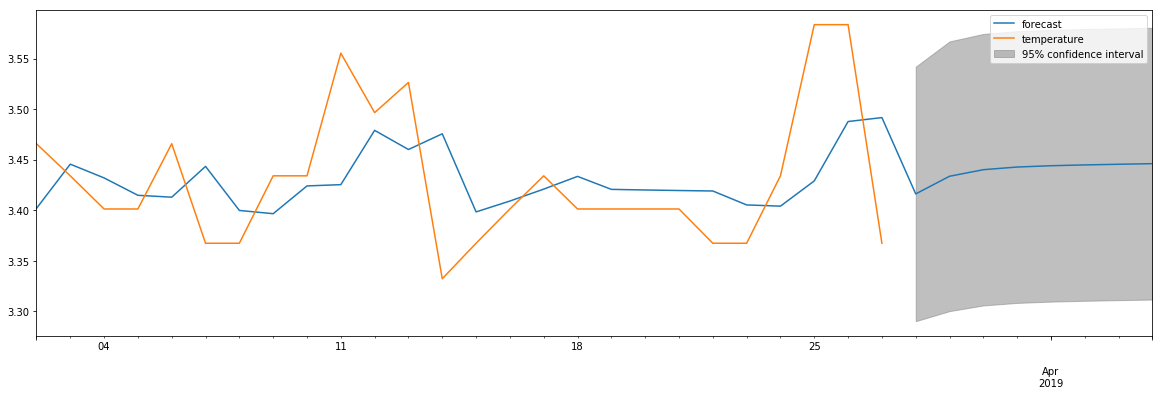

In [190]:
result_ARIMA.plot_predict(1,34)
#result_ARIMA.forecast(steps=7)


In [136]:

answer=np.exp(result_ARIMA)

AttributeError: 'ARIMAResults' object has no attribute 'exp'

In [130]:
np.exp(x[1])

array([ 1.06633482,  1.07043535,  1.07092524,  1.07098533,  1.07099273,
        1.07099364,  1.07099375])

In [ ]:
n